In [1]:
import pandas as pd

graph_df = pd.read_csv('analytics.csv')

graph_df.head()

raining_list = []

not_raining_list = []

graph_df['date_time']=pd.to_datetime(graph_df['last_update']/1000, unit='s')

graph_df['date_time'].head()

graph_df['hours']= graph_df['date_time'].dt.hour


In [2]:
numbers = graph_df['number'].unique()   #create list of unique station numbers

bikes_by_station_by_hour = {}    #will store avg available_bikes for each station by hour of day

for i in numbers:
    bikes_by_station_by_hour[i]=[]

bikes_by_station_by_hour[2]

[]

In [3]:
hours = graph_df['hours'].unique()   #create list of 24 hours
hours.sort()    #sort hours
     


for i in hours:    #iterate over hours
    hour = graph_df[graph_df['hours']==i]    #for each hour create data frame with only that hour to calculate avg for that hour
    for j in numbers:    #iterate over unique station numbers
        avg_available_bikes = hour.groupby(['number'])['available_bikes'].mean()[j]    #get mean available_bikes for station j
        bikes_by_station_by_hour[j].append(avg_available_bikes)
#         bikes_by_station_by_hour[j].append(i)
        #print(i)


In [4]:
#  bikes_by_station_by_hour[1]

In [33]:
station1=bikes_by_station_by_hour[105]
station1
station2=bikes_by_station_by_hour[25]
station2

[10.652777777777779,
 10.777777777777779,
 11.079365079365079,
 10.596491228070175,
 9.4179104477611943,
 10.253731343283581,
 12.016129032258064,
 14.530303030303031,
 20.03448275862069,
 21.309090909090909,
 20.07017543859649,
 20.241935483870968,
 21.12280701754386,
 20.75,
 20.491803278688526,
 17.5,
 11.623188405797102,
 7.2898550724637685,
 8.2537313432835813,
 8.6060606060606055,
 9.935483870967742,
 10.903225806451612,
 10.403225806451612,
 10.421875]

In [34]:
df = pd.DataFrame(data ={'hour':hours,'available_bikes':station1,'available_bikes2':station2})

In [35]:
group = df.groupby('hour')

      available_bikes  available_bikes2
hour                                   
0            5.093023         10.652778
1            4.950000         10.777778
2            4.787879         11.079365
3            4.666667         10.596491
4            4.595238          9.417910
5            4.684211         10.253731
6            4.257143         12.016129
7            3.552632         14.530303
8            1.900000         20.034483
9            1.387097         21.309091
10           1.114286         20.070175
11           1.205128         20.241935
12           1.459459         21.122807
13           2.121951         20.750000
14           3.315789         20.491803
15           3.057143         17.500000
16           3.581395         11.623188
17           4.219512          7.289855
18           4.051282          8.253731
19           4.292683          8.606061
20           4.702703          9.935484
21           4.666667         10.903226
22           5.085714         10.403226


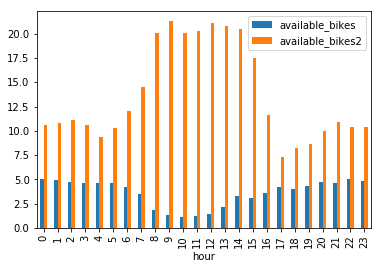

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
avg = group.sum()
print(avg)
avg.plot(kind='bar')
